In [60]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

nltk.download('stopwords')
arabic_stopwords = set(stopwords.words('arabic'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import pandas as pd

df = pd.read_csv('MADAR-Corpus-6-train.tsv', sep='\t')
print(df.head())

df.to_csv('madar_corpus_train.csv', index=False)

                    شناهوا م تخصص هذا المطعم اليوم ؟  RAB
0                                          جو لطيف .  MSA
1                              انبسطت كتير بمعرفتك .  BEI
2                   وايتر ، بتجيب الحساب إذا بتريد ؟  BEI
3                                  إذا بتريد تركني .  BEI
4  دعني أري ذلك ، نعم ـ اليوم يوجد غذاء خاص سوف ي...  MSA


In [62]:
def load_data(path):
    df = pd.read_csv(path)
    return df

In [ ]:
def clean_text(text):
    text = str(text)
    text = re.sub(r"http\S+", "", text)           # Remove URLs
    text = re.sub(r"@\w+", "", text)              # Remove mentions
    text = re.sub(r"#", "", text)                 # Remove hashtag symbols
    text = re.sub(r"[0-9]", "", text)             # Remove numbers
    text = re.sub(r"[^\w\s]", "", text)           # Remove punctuation
    text = re.sub(r"\s+", " ", text).strip()      # Remove extra spaces
    return text

In [ ]:
def normalize_arabic(text):
    text = re.sub(r'[\u064B-\u0652]', '', text)   # Remove diacritics
    text = re.sub(r'[إأآا]', 'ا', text)           # Normalize alef
    text = re.sub(r'ى', 'ي', text)                # Normalize yaa
    text = re.sub(r'ة', 'ه', text)                # Normalize taa marbuta
    text = re.sub(r'(.)\1{2,}', r'\1', text)      # Remove elongations
    return text

In [65]:
def remove_stopwords(text):
    words = text.split()
    return ' '.join([word for word in words if word not in arabic_stopwords])

In [66]:
def preprocess_text(text):
    text = clean_text(text)
    text = normalize_arabic(text)
    text = remove_stopwords(text)
    return text

In [67]:
def load_data(path):
    df = pd.read_csv(path)
    return df

In [ ]:
df = pd.read_csv('MADAR-Corpus-6-train.tsv', sep='\t')
print(df.head())

df.columns = ['text', 'dialect']
df['processed_text'] = df['text'].apply(preprocess_text)
X_train, X_test, y_train, y_test = train_test_split(
    df['processed_text'], df['dialect'], test_size=0.2, stratify=df['dialect'], random_state=42)

                    شناهوا م تخصص هذا المطعم اليوم ؟  RAB
0                                          جو لطيف .  MSA
1                              انبسطت كتير بمعرفتك .  BEI
2                   وايتر ، بتجيب الحساب إذا بتريد ؟  BEI
3                                  إذا بتريد تركني .  BEI
4  دعني أري ذلك ، نعم ـ اليوم يوجد غذاء خاص سوف ي...  MSA


In [69]:
tfidf = TfidfVectorizer(max_features=5000)
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

In [70]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

LogisticRegression(max_iter=1000)

Accuracy: 0.8192592592592592
              precision    recall  f1-score   support

         BEI       0.83      0.81      0.82      1800
         CAI       0.80      0.78      0.79      1800
         DOH       0.74      0.77      0.75      1800
         MSA       0.75      0.88      0.81      1800
         RAB       0.93      0.84      0.88      1800
         TUN       0.89      0.83      0.86      1800

    accuracy                           0.82     10800
   macro avg       0.82      0.82      0.82     10800
weighted avg       0.82      0.82      0.82     10800



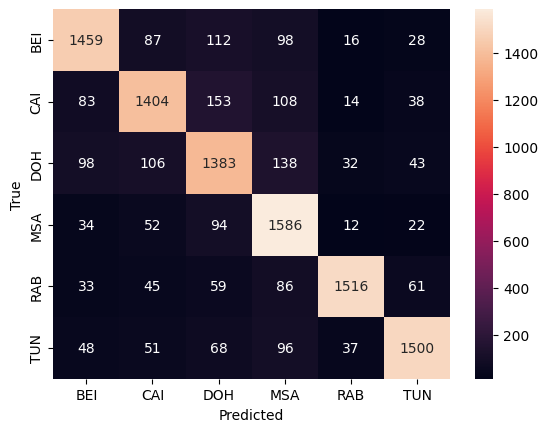

In [71]:
y_pred = model.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

labels = sorted(df['dialect'].unique())
cm = confusion_matrix(y_test, y_pred, labels=labels)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [72]:
def predict_dialect(text):
    processed = preprocess_text(text)
    vec = tfidf.transform([processed])
    pred = model.predict(vec)
    return pred[0]

In [83]:
samples = ["يا عم الحج قرفتني",
           "ابغى اكل لحم",
           "واحد شاهي لاهنت"]
for sample in samples:
    print(f"Predicted Dialect: {predict_dialect(sample)}")

Predicted Dialect: BEI
Predicted Dialect: DOH
Predicted Dialect: DOH
